In [27]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.special import comb
import torch

## In $R^3$ 

In [11]:
# Lorentz inner product
def lpd(x,y):
    n = len(x)
    gg = np.eye(n)
    gg[0,0] = -1
    return x.T@gg@y

# Exponential Map
def expmap(mu, u):
    if round(lpd(mu,mu),6) != -1:
        return 'Input 1 is Not on the Hyperbolic space'
    if lpd(mu,u) != 0:
        return 'Input 2 is Not a Tangent vector'
    return np.cosh(np.sqrt(lpd(u,u)))*mu + np.sinh(np.sqrt(lpd(u,u)))*u/np.sqrt(lpd(u,u))

# Logarithm Map
def logmap(mu,z):
    if round(lpd(mu,mu),6) != -1 or round(lpd(z,z),6) != -1:
        return 'Input is Not on the Hyperbolic space'    
    a = -lpd(mu,z)
    return np.arccosh(a)/np.sqrt(a**2 -1)*(z - a*mu)

# Geodesic
def geodesics(a,b,t):
    if round(lpd(a,a),6) != -1 or round(lpd(b,b),6) != -1:
        return 'Input is Not on the Hyperbolic space'
    u = logmap(a,b)
    return np.cosh(t*np.sqrt(lpd(u,u)))*a + np.sinh(t*np.sqrt(lpd(u,u)))*u/np.sqrt(lpd(u,u))

In [12]:
a = np.array([1,2,3])
b = np.array([4,5,6])
lpd(a,b)

24.0

In [13]:
mu0 = np.array([3,0,0])
u = np.array([1,2,2])

expmap(mu0,u)

'Input 1 is Not on the Hyperbolic space'

In [14]:
mu0 = np.array([1,0,0])
z = np.array([3,2,2])

lpd(logmap(mu0,z), mu0)

0.0

In [15]:
np.arccosh(3)/np.sqrt(8)*2

1.246450480280461

In [16]:
c = geodesics(mu0,z,1/2)
round(lpd(c,c),6) == -1

True

### Compare

In [17]:
np.random.seed(1000)

mean = np.zeros(2)
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (300,), 'raise')

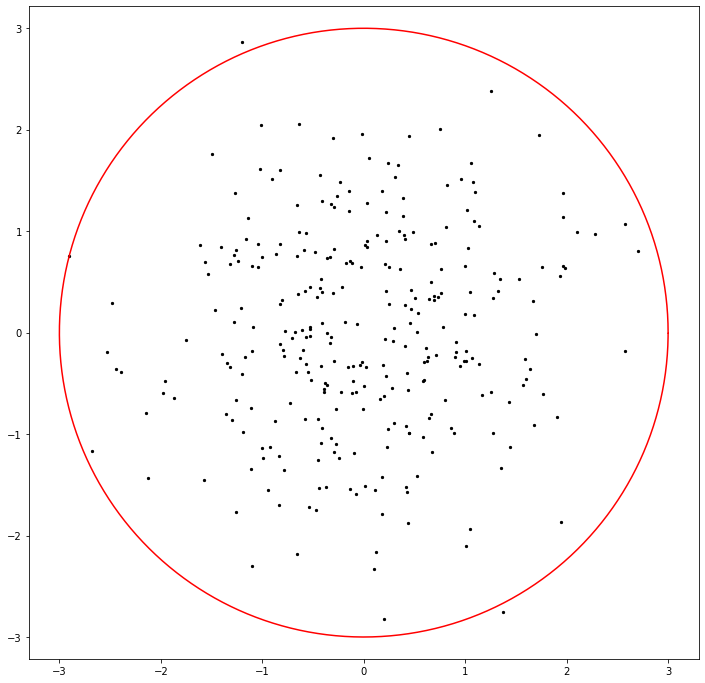

In [18]:
plt.figure(figsize = (12,12))
plt.scatter(u[:, 0], u[:, 1], c= 'black', s = 5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')
plt.axis('equal')

plt.show()

### Two points case 

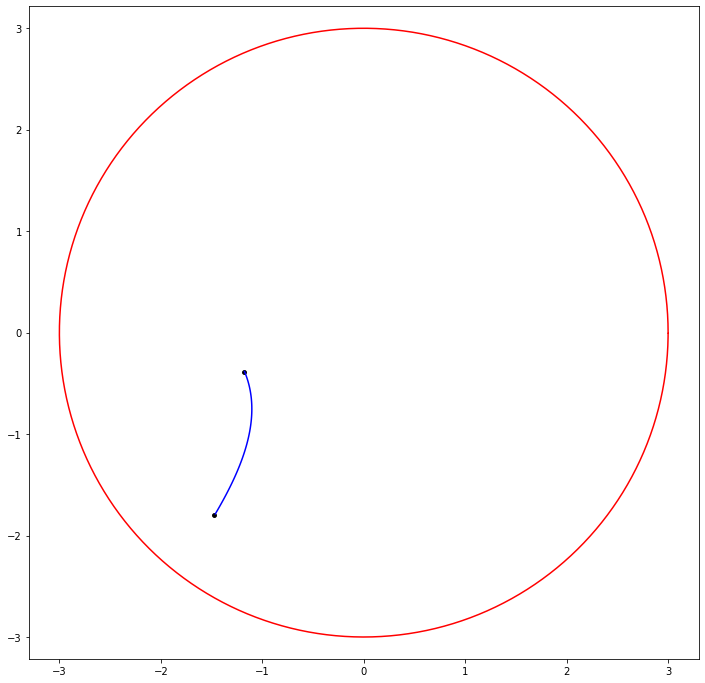

In [19]:
np.random.seed(1010)

# 1. Scatter Plot
mean = np.zeros(2)
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (2,), 'raise')

plt.figure(figsize = (12,12))
plt.scatter(u[:, 0], u[:, 1], c= 'black', s = 15)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# 2. Circle Plot
r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')

# 3. Geodesic plot
u_ = np.hstack((np.zeros((2,1)), u))
u_

z1 = expmap(mu0, u_[0,:])
z2 = expmap(mu0, u_[1,:])
t = np.arange(0,1,0.01)
nn = len(t)
x1 = np.zeros(nn)
y1 = np.zeros(nn)

for k in range(nn):
    x1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[1]
    y1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[2]
    
plt.plot(x1,y1, c = 'blue')

plt.axis('equal')

plt.show()

### More points case 

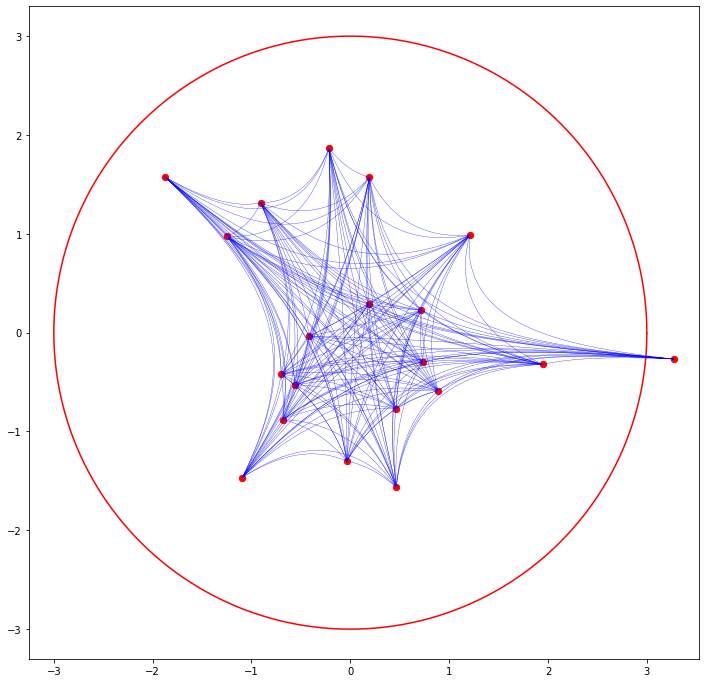

In [20]:
np.random.seed(1100)

num = 20

# 1. Scatter Plot
mean = np.zeros(2)
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (num,), 'raise')


plt.figure(figsize = (12,12))
plt.scatter(u[:, 0], u[:, 1], c= 'red', s = 40)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# 2. Circle Plot
r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')

# 3. Geodesic plot
nchs2 = int(comb(num,2))
index = list(combinations(range(num),2))

for i in range(nchs2):
    u_ = np.hstack((np.zeros((2,1)), u[index[i],:]))
    z1 = expmap(mu0, u_[0,:])
    z2 = expmap(mu0, u_[1,:])
    t = np.arange(0,1,0.01)
    nn = len(t)
    x1 = np.zeros(nn)
    y1 = np.zeros(nn)

    for k in range(nn):
        x1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[1]
        y1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[2]
    
    plt.plot(x1,y1, c = 'blue', linewidth=0.3)


# u_ = np.hstack((np.zeros((2,1)), u))
# u_

plt.axis('equal')

plt.show()

### Recursive estimate in tangent space 

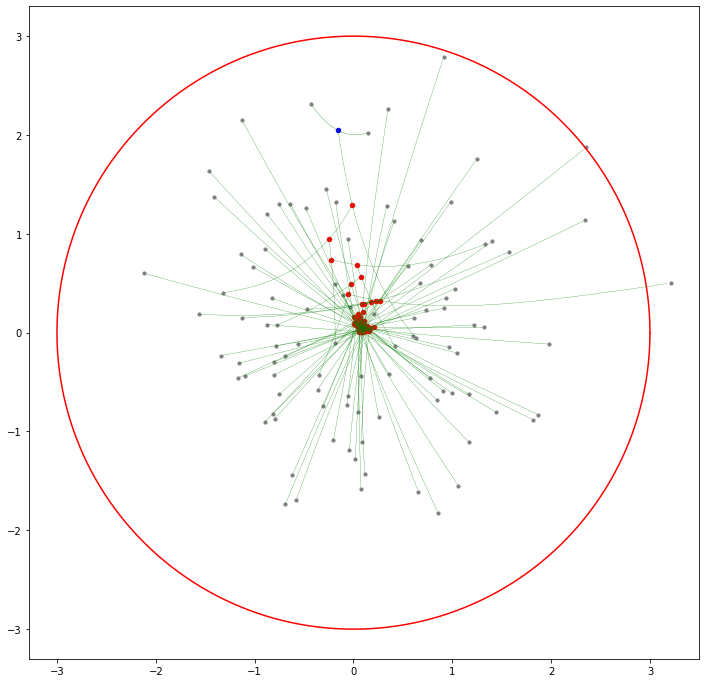

In [21]:
np.random.seed(120)
num = 100

# 1. Scatter Plot
mean = np.zeros(2)
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (num,), 'raise')


plt.figure(figsize = (12,12))
plt.scatter(u[:, 0], u[:, 1], c= 'gray', s = 10)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# 2. Circle Plot
r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')

# 3. Geodesic plot
u_ = np.hstack((np.zeros((num,1)), u))
v_ = np.zeros((num-1, 3))
z1 = expmap(mu0, u_[0,:])
z2 = expmap(mu0, u_[1,:])
mid = logmap(mu0, geodesics(z1, z2, 0.5))
v_[0, :] = mid

t = np.arange(0, 1, 0.01)
nn = len(t)
x1 = np.zeros(nn)
y1 = np.zeros(nn)

for k in range(nn):
    x1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[1]
    y1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[2]
    
plt.plot(x1,y1, c = 'green', linewidth = 0.3)
v_[0,:] = logmap(mu0, geodesics(z1, z2, 0.5))
x_, y_ = v_[0,1:]
plt.scatter(x_,y_, c = 'blue', s = 20)

for i in range(1, num - 1):
    z1 = expmap(mu0, v_[i-1,:])
    z2 = expmap(mu0, u_[i+1,:])
    x1 = np.zeros(nn)
    y1 = np.zeros(nn)
    
    for k in range(nn):
        x1[k] = logmap(mu0, geodesics(z1, z2, t[k]))[1]
        y1[k] = logmap(mu0, geodesics(z1, z2, t[k]))[2]
        
    plt.plot(x1,y1, c = 'green', linewidth = 0.25)
    v_[i,:] = logmap(mu0, geodesics(z1, z2, 1/(i+2)))
    x_, y_ = v_[i,1:]
    plt.scatter(x_,y_, c = 'red', s = 20)
    
    
plt.axis('equal')

plt.show()

0.0582873432593396

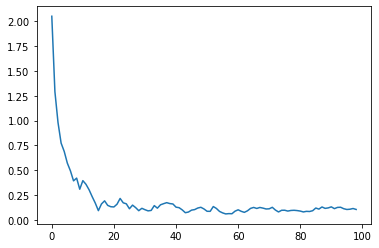

In [22]:
v = v_[:,1:]

plt.plot(np.linalg.norm(v, ord = 2, axis = 1))

np.min(np.linalg.norm(v, ord = 2, axis = 1))